# Problem Statement
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.preprocessing import normalize,MinMaxScaler, StandardScaler

import sklearn.cluster as skc

## 2. Import Dataset

In [2]:
airline_data = pd.read_excel(r'EastWestAirlines.xlsx')
airline_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## 3. EDA
### 3.1 Initial Analysis

In [3]:
airline_data.shape

(3999, 12)

In [4]:
airline_data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
airline_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


### 3.2 Data Preprocessing

In [7]:
airline_data.drop('ID#',axis=1,inplace=True)

In [8]:
airline_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
# to scale data between -1 and +1
scaler = StandardScaler()
airline_data_2 = scaler.fit_transform(airline_data)

In [10]:
airline_data_2 = pd.DataFrame(airline_data_2, columns=['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?'])
airline_data_2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [11]:
airline_data_2.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03
mean,5.756558e-16,-7.588884e-17,9.288838e-15,-7.447781e-16,-4.371208e-16,-5.515024e-16,-2.877696e-15,5.781822e-16,-1.206323e-15,1.406727e-15,-3.352657e-15
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-7.304396e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-7.099918e-01,-1.208203e+00,-3.286033e-01,-3.621679e-01,-1.993611e+00,-7.669193e-01
25%,-5.465676e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-6.582276e-01,-8.957878e-01,-3.286033e-01,-3.621679e-01,-8.661823e-01,-7.669193e-01
50%,-3.027332e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-4.130308e-01,4.145743e-02,-3.286033e-01,-3.621679e-01,-1.092530e-02,-7.669193e-01
75%,1.866028e-01,-1.862987e-01,6.831212e-01,-9.824189e-02,-6.276658e-02,2.756198e-01,5.621492e-01,-1.064658e-01,-9.850333e-02,8.097050e-01,1.303918e+00
max,1.618884e+01,1.422486e+01,2.135821e+00,1.344898e+01,2.042732e+01,1.020957e+01,7.747696e+00,2.168300e+01,1.361205e+01,2.023095e+00,1.303918e+00


# ------------------------=--------------------------

In [14]:
# another way to scale data

In [12]:
from sklearn.preprocessing import normalize
airline_data_3 = pd.DataFrame(normalize(airline_data),columns=airline_data.columns)
airline_data_3.headad()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


In [13]:
airline_data_3.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3.999000e+03,3.999000e+03,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.896759,0.002967,6.018929e-05,4.657600e-05,4.622071e-05,0.236466,0.000275,0.007905,0.000025,0.136356,0.000010
std,0.172929,0.024981,9.422640e-05,9.549912e-05,9.533347e-05,0.244995,0.000379,0.028669,0.000115,0.172916,0.000025
min,0.000000,0.000000,5.865288e-07,5.865288e-07,5.865288e-07,0.000000,0.000000,0.000000,0.000000,0.001455,0.000000
25%,0.887264,0.000000,2.171282e-05,1.013626e-05,1.019430e-05,0.037068,0.000067,0.000000,0.000000,0.036485,0.000000
50%,0.967287,0.000000,3.893489e-05,2.106245e-05,2.106245e-05,0.153473,0.000162,0.000000,0.000000,0.071895,0.000000
75%,0.992306,0.000000,6.681146e-05,4.699541e-05,4.639664e-05,0.371607,0.000326,0.003320,0.000013,0.156184,0.000009
max,0.999995,0.707105,1.942986e-03,1.942986e-03,1.942986e-03,0.999039,0.005434,0.568473,0.005434,0.999854,0.000496


# ------------------------=--------------------------

## 5. Model Building || 6. Model Training 

# Hierarchical Clustering

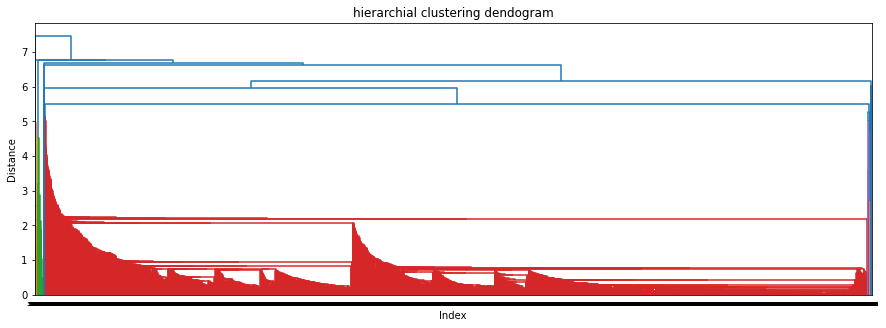

In [317]:
z=linkage(airline_data_2,method='single',metric='euclidean')

plt.figure(figsize=(15,5));plt.title("hierarchial clustering dendogram")
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=6)
plt.show()

In [318]:
# create clusters
hc_model = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')  
hc_model

AgglomerativeClustering(linkage='single', n_clusters=5)

In [319]:
y_hc = hc_model.fit_predict(airline_data)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [320]:
Clusters['Clusters'].unique()

array([0, 1, 2, 4, 3], dtype=int64)

In [321]:
airline_data['clusters'] = Clusters
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,0
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,0
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,0
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,0


In [322]:
airline_data[airline_data['clusters']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,0
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,0
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,0
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,0


In [323]:
airline_data['clusters'].value_counts()

0    3954
1      28
2      15
4       1
3       1
Name: clusters, dtype: int64

In [324]:
airline_data.groupby('clusters').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters,,,,,,,,,,,
0,-0.003802,0.001630,0.007656,-0.098242,0.000714,0.000532,-0.009216,-0.007224,-0.007281,0.000737,-0.001223
1,0.041606,-0.186299,-0.613932,6.675367,-0.062767,-0.228576,0.539834,0.045444,0.080412,-0.100121,0.046624
2,-0.212081,-0.100118,-0.769578,13.448976,-0.062767,0.135234,0.763483,0.166147,0.481559,-0.020837,0.061416
3,0.858575,0.460058,-0.769578,-0.098242,-0.062767,2.269723,7.747696,21.683004,13.612053,-1.329648,1.303918
4,16.188836,-0.186299,-0.769578,-0.098242,-0.062767,-0.001526,2.124225,3.116313,5.702117,1.532509,1.303918


###### Conclusion - As hierarchical clustering is done by cutting the dendogram from up, so about 98% of the points are clustered in group 1 and remaining points are clustered in other groups.

### hierarchical clustering using complete linkage

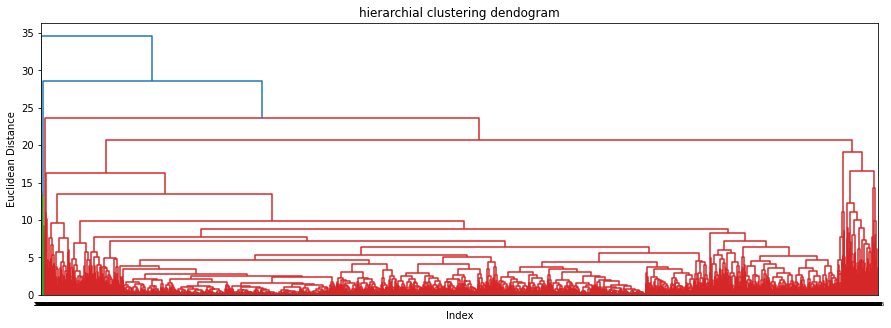

In [326]:
z=linkage(airline_data,method='complete',metric='euclidean')

plt.figure(figsize=(15,5))
plt.title("hierarchial clustering dendogram")
plt.xlabel("Index")
plt.ylabel("Euclidean Distance")
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=6)
plt.show()

In [327]:
# create clusters
hc_model = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')  
hc_model

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [328]:
y_hc = hc_model.fit_predict(airline_data)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,1
...,...
3994,1
3995,1
3996,1
3997,1


In [329]:
print(Clusters['Clusters'].unique())

[1 0 2 3 4]


In [330]:
airline_data['clusters'] = Clusters
airline_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,1
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,1
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,1
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,1
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,1


In [331]:
airline_data['clusters'].value_counts()

1    3782
0     193
2      15
3       5
4       4
Name: clusters, dtype: int64

###### Conclusion - here, 94% points are clustered in first group/cluster whose count is more than 50%.

### hierarchical clustering using complete ward

In [333]:
# create clusters
hc_model = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')  
hc_model

AgglomerativeClustering(n_clusters=5)

In [336]:
airline_data_ = pd.read_excel(r'EastWestAirlines.xlsx')
airline_data_.drop('ID#',axis=1,inplace=True)
scaler = StandardScaler()
airline_data__ = scaler.fit_transform(airline_data_)
airline_data = pd.DataFrame(airline_data__,columns=airline_data_.columns)

y_hc = hc_model.fit_predict(airline_data)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters['Clusters'].unique()

array([1, 0, 3, 2, 4], dtype=int64)

In [337]:
airline_data['clusters'] = Clusters
airline_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,1
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,1
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,1
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,1
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0


In [338]:
airline_data['clusters'].value_counts()

1    2446
0    1362
2     130
3      43
4      18
Name: clusters, dtype: int64

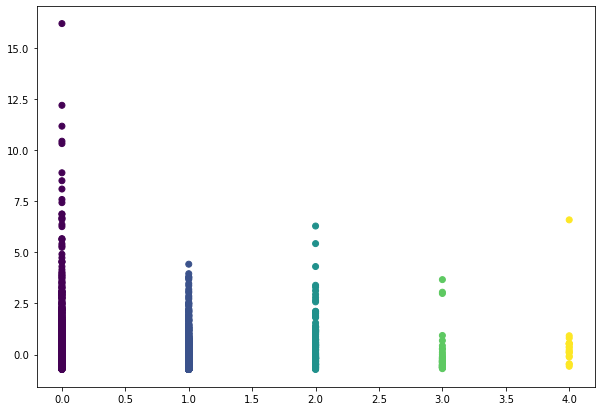

In [339]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline_data['clusters'],airline_data['Balance'], c=hc_model.labels_)

## Conclusion - here, 61% points are clustered in one group/cluster  and 34% datapoints are clustered in second group.

# ====#=+==============================================+=# ====

# KMeans Clustering

In [340]:
airline_data = pd.read_excel(r'EastWestAirlines.xlsx')
airline_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [341]:
airline_data.drop('ID#',axis=1,inplace=True)

In [342]:
airline_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [343]:
# Standardization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
adata = scaler.fit_transform(airline_data)
adata

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

### To find optimum number of cluster

In [344]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(adata)
    wcss.append(round(kmeans.inertia_))

In [345]:
wcss

[43989, 35410, 30900, 27154, 24885, 22304, 19503, 17317, 15960, 14729]

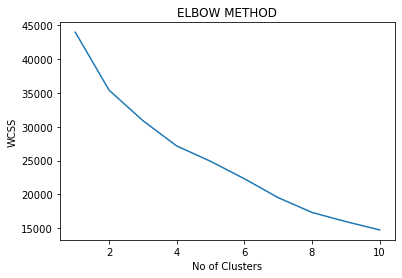

In [346]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

### Inference : K = 2,3

## find optimal number of clusters using silhoutte score

In [347]:
from sklearn.metrics import silhouette_score
silhoutte_value = []
for i in range(2,11):
    kmean = KMeans(n_clusters=i,random_state=12)
    kmean.fit(adata)
    silhoutte_value.append(silhouette_score(adata,kmean.labels_))

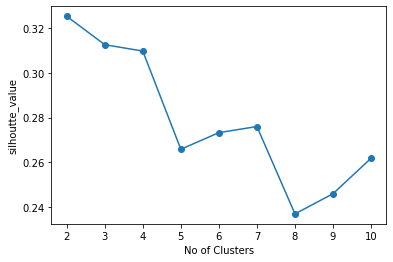

In [348]:
plt.plot(range(2,11),silhoutte_value)
plt.scatter(range(2,11),silhoutte_value)
plt.xlabel('No of Clusters')
plt.ylabel('silhoutte_value')
plt.show()

### Inference : k = 2,3,4

## find optimal number of clusters using Calinski Harabasz score

In [349]:
from sklearn.metrics import calinski_harabasz_score
calinski_score = []
for i in range(2,11):
    kmean = KMeans(n_clusters=i,random_state=12)
    kmean.fit(adata)
    calinski_score.append(calinski_harabasz_score(adata,kmean.labels_))

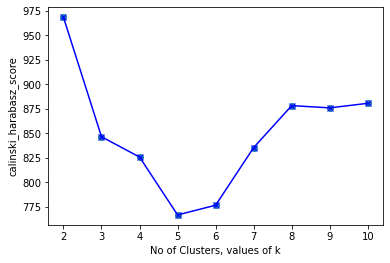

In [350]:
plt.plot(range(2,11),calinski_score,'bx-')
plt.scatter(range(2,11),calinski_score)
plt.xlabel('No of Clusters, values of k')
plt.ylabel('calinski_harabasz_score')
plt.show()

### Inference: k = 2,8,10

##### clustering model for k = 2

In [351]:
# create clusters
kmean_model = KMeans(n_clusters=2,random_state=12)  
kmean_model

KMeans(n_clusters=2, random_state=12)

In [352]:
y_kmean = kmean_model.fit_predict(adata) +1
y_kmean

array([1, 1, 1, ..., 1, 1, 1])

In [353]:
Clusters=pd.DataFrame(y_kmean,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,2
...,...
3994,1
3995,1
3996,1
3997,1


In [354]:
Clusters['Clusters'].unique()

array([1, 2])

In [355]:
airline_data['clusters'] = Clusters
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [356]:
airline_data.groupby('clusters').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters,,,,,,,,,,,
1,45041.650352,89.232481,1.310716,1.016685,1.000371,5421.404894,7.363737,215.211346,0.635521,3720.834631,0.206897
2,132760.658986,257.798771,3.610599,1.009985,1.036866,41429.117512,20.380952,967.233487,2.902458,4942.417819,0.708909


In [357]:
airline_data['clusters'].value_counts()

1    2697
2    1302
Name: clusters, dtype: int64

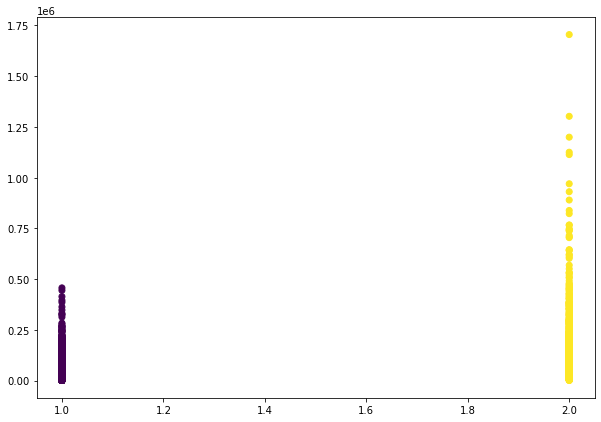

In [358]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline_data['clusters'],airline_data['Balance'], c=kmean_model.labels_)

#### Here, 2 clusters are created. 

##### clustering model for k = 3

In [359]:
# create clusters
kmean_model = KMeans(n_clusters=3,random_state=12)  
kmean_model

KMeans(n_clusters=3, random_state=12)

In [361]:
y_kmean = kmean_model.fit_predict(adata) +1
y_kmean

array([2, 2, 2, ..., 1, 2, 2])

In [362]:
Clusters=pd.DataFrame(y_kmean,columns=['Clusters'])
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,1
...,...
3994,2
3995,2
3996,1
3997,2


In [363]:
Clusters['Clusters'].unique()

array([2, 1, 3])

In [364]:
airline_data['clusters'] = Clusters
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [365]:
airline_data.groupby('clusters').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters,,,,,,,,,,,
1,117871.954290,150.673617,3.744186,1.002406,1.038492,40719.429030,19.040898,347.714515,1.029671,4880.696872,0.653569
2,44560.340935,100.494009,1.241979,1.018941,1.000387,4883.880170,7.040974,198.838423,0.621569,3713.902203,0.206030
3,194350.181818,778.460606,2.145455,1.036364,1.000000,31215.236364,26.890909,5404.654545,15.763636,4703.181818,0.806061


In [366]:
airline_data['clusters'].value_counts()

2    2587
1    1247
3     165
Name: clusters, dtype: int64

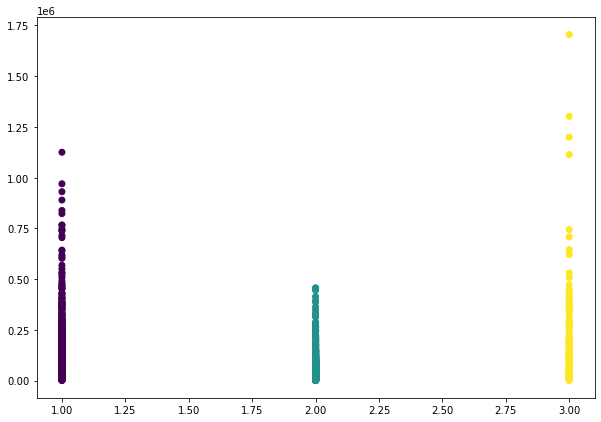

In [367]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline_data['clusters'],airline_data['Balance'], c=kmean_model.labels_)

##### clustering model for k = 8

In [377]:
# create clusters
kmean_model = KMeans(n_clusters=8,random_state=12)  
kmean_model

KMeans(random_state=12)

In [378]:
y_kmean = kmean_model.fit_predict(adata)+1
y_kmean

array([8, 8, 8, ..., 1, 3, 3])

In [379]:
Clusters=pd.DataFrame(y_kmean,columns=['Clusters'])
Clusters

,Clusters
0,8
1,8
2,8
3,8
4,7
...,...
3994,1
3995,1
3996,1
3997,3


In [380]:
Clusters['Clusters'].unique()

array([8, 7, 1, 5, 2, 6, 4, 3])

In [381]:
airline_data['clusters'] = Clusters
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,8
1,19244,0,1,1,1,215,2,0,0,6968,0,8
2,41354,0,1,1,1,4123,4,0,0,7034,0,8
3,14776,0,1,1,1,500,1,0,0,6952,0,8
4,97752,0,4,1,1,43300,26,2077,4,6935,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,3


In [382]:
airline_data.groupby('clusters').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters,,,,,,,,,,,
1,58169.349383,98.964198,1.695062,1.000000,1.000000,10584.520988,10.607407,421.613580,1.295062,4254.603704,1.000000
2,199014.459016,520.221311,2.385246,1.000000,1.000000,36582.278689,29.844262,6137.696721,17.696721,4762.639344,0.819672
3,34529.920172,32.453219,1.249785,1.000000,1.000000,4387.308155,6.595708,149.683262,0.448927,2104.846352,0.000000
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
6,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273
7,138370.597561,61.925610,4.201220,1.000000,1.002439,50224.776829,19.959756,388.939024,1.180488,4957.047561,0.630488
8,59654.209494,32.939112,1.502580,1.000000,1.001032,6295.554180,8.510836,175.981424,0.532508,5643.721362,0.000000


In [383]:
airline_data['clusters'].value_counts()

3    1165
8     969
7     820
1     810
2     122
6      55
5      43
4      15
Name: clusters, dtype: int64

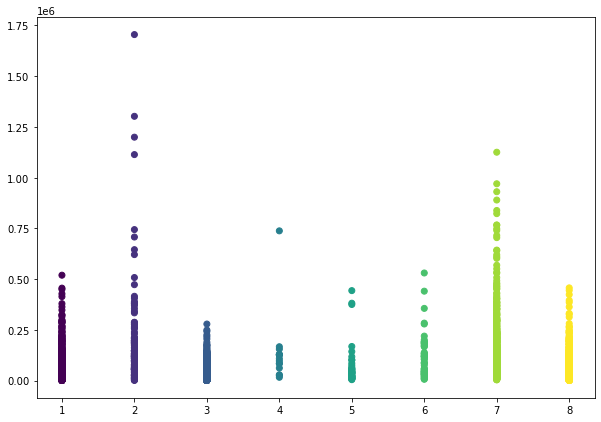

In [384]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline_data['clusters'],airline_data['Balance'], c=kmean_model.labels_)

## conclusion

In [388]:
airline_data_ = pd.read_excel(r'EastWestAirlines.xlsx')
airline_data.insert(loc=0,column='ID',value = airline_data_['ID#'])

###### datapoints included in cluster 1:

In [389]:
airline_data[airline_data['clusters']==1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,1
19,20,23354,0,3,1,1,10447,5,0,0,6896,1,1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,1
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,1
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,1
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1


###### datapoints included in cluster 2:

In [390]:
airline_data[airline_data['clusters']==2]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,2
94,97,185549,0,5,1,1,110859,39,2950,16,6778,1,2
112,115,124198,0,5,1,1,66330,23,4833,10,7710,0,2
127,130,213150,0,4,1,1,56308,41,5200,14,7645,1,2
135,138,259484,1776,1,1,1,19172,26,7172,23,6723,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,2
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,2
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,2
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,2


###### datapoints included in cluster 3:

In [391]:
airline_data[airline_data['clusters']==3]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
1129,1141,1625,0,1,1,1,1375,4,0,0,1547,0,3
1424,1438,22093,0,3,1,1,14857,11,200,1,2587,0,3
1431,1445,44665,0,1,1,1,333,2,333,2,3601,0,3
1522,1537,7291,0,1,1,1,0,0,0,0,4104,0,3
1549,1564,65021,0,2,1,1,10369,12,0,0,3547,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,3
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,3
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


###### datapoints included in cluster 4:

In [392]:
airline_data[airline_data['clusters']==4]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,4
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,4
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,4
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,4
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,4
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,4
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,4
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,4
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,4
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,4


###### datapoints included in cluster 5:

In [394]:
airline_data[airline_data['clusters']==5]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,5
198,202,8669,0,1,3,1,11397,16,0,0,7486,1,5
226,230,117329,0,1,2,1,6448,11,0,0,7416,1,5
381,386,167670,0,1,3,1,15907,13,0,0,6994,0,5
392,398,11189,0,1,2,1,9044,20,0,0,8296,1,5
561,568,380930,0,2,2,1,22485,25,213,1,6539,1,5
794,804,55610,0,1,2,1,5095,13,0,0,6151,0,5
940,951,44824,0,1,3,1,21107,19,2000,4,5916,1,5
1149,1161,84856,0,1,2,1,6894,13,0,0,5547,0,5
1270,1283,16103,0,1,3,1,10819,13,0,0,5427,0,5


###### datapoints included in cluster 6:

In [395]:
airline_data[airline_data['clusters']==6]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
70,72,84409,5031,2,1,1,15436,16,1150,4,7766,0,6
335,340,278457,6727,4,1,1,57313,27,1000,2,7101,1,6
420,426,529886,7210,1,1,1,23866,26,7741,15,8296,1,6
532,538,86520,3445,5,1,1,64450,20,1000,2,6592,1,6
589,596,133445,8264,1,1,1,3375,13,0,0,6492,1,6
676,686,26556,3490,1,1,1,2845,14,720,4,6339,1,6
681,691,119082,5051,1,1,1,4230,17,3600,14,6340,1,6
743,753,440265,4081,1,1,1,22750,15,1250,10,6234,1,6
800,810,74924,6286,4,1,1,59650,13,0,0,6141,0,6
833,843,114932,8559,1,1,1,3150,13,1650,12,6092,1,6


###### datapoints included in cluster 7:

In [396]:
airline_data[airline_data['clusters']==7]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,7
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,7
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,7
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,7
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,3931,57642,0,4,1,1,52176,15,0,0,1564,1,7
3930,3953,40424,0,4,1,1,44110,26,343,3,1523,1,7
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0,7
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,7


###### datapoints included in cluster 8:

In [397]:
airline_data[airline_data['clusters']==8]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,8
1,2,19244,0,1,1,1,215,2,0,0,6968,0,8
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,8
3,4,14776,0,1,1,1,500,1,0,0,6952,0,8
5,6,16420,0,1,1,1,0,0,0,0,6942,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,2981,65926,0,3,1,1,11639,17,0,0,3362,0,8
2975,2997,87507,0,3,1,1,17714,19,0,0,3274,0,8
2984,3006,326201,0,1,1,1,19350,14,0,0,3119,0,8
3763,3786,83276,0,3,1,1,22539,8,650,2,3424,0,8


# ====#=+==============================================+=# ====

# DBSCAN

In [398]:
airline_data_1 = pd.read_excel(r'EastWestAirlines.xlsx')
airline_data_1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [399]:
airline_data_1 = airline_data_1.drop(labels='ID#',axis=1)

In [400]:
airline_data_1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [401]:
scaler = StandardScaler()
scaled_airline_data = scaler.fit_transform(airline_data_1)

In [402]:
airline_data = pd.DataFrame(scaled_airline_data,columns=airline_data_1.columns)
airline_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [403]:
# create clusters
dbscan_model = DBSCAN()
dbscan_model

DBSCAN()

In [404]:
y_dbscan = dbscan_model.fit_predict(airline_data)

In [405]:
Clusters=pd.DataFrame(y_dbscan,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,-1
3997,0


In [406]:
airline_data['clusters'] = Clusters
airline_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,-1


In [407]:
airline_data['clusters'].value_counts()

 0     1453
-1     1413
 1      268
 5      235
 6      173
 9      115
 3      114
 4      111
 8       52
 10      21
 12       9
 13       9
 14       6
 2        5
 7        5
 11       5
 15       5
Name: clusters, dtype: int64

#### 1413 outliers are present.

##### hyperparameter tuning

In [453]:
dbscan_model = DBSCAN(eps = 2,min_samples=10)
dbscan_model

y_dbscan = dbscan_model.fit_predict(airline_data)
Clusters=pd.DataFrame(y_dbscan,columns=['Clusters'])
airline_data['clusters'] = Clusters
airline_data['clusters'].value_counts()

 0    2442
 1    1304
-1     237
 2      16
Name: clusters, dtype: int64

In [454]:
2442/3999,1304/3999

(0.6106526631657915, 0.326081520380095)

In [460]:
dbscan_model = DBSCAN(eps = 2,min_samples=10)
dbscan_model

y_dbscan = dbscan_model.fit_predict(airline_data)
Clusters=pd.DataFrame(y_dbscan,columns=['Clusters'])
airline_data['clusters'] = Clusters
airline_data['clusters'].value_counts()

 0    2439
 1    1296
-1     248
 2      16
Name: clusters, dtype: int64

In [465]:
dbscan_model = DBSCAN(eps = 2,min_samples=10)
dbscan_model

y_dbscan = dbscan_model.fit_predict(airline_data)
Clusters=pd.DataFrame(y_dbscan,columns=['Clusters'])
airline_data['clusters'] = Clusters
airline_data['clusters'].value_counts()

 0    2439
 1    1296
-1     248
 2      16
Name: clusters, dtype: int64

In [466]:
airline_data.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0


In [467]:
airline_data.groupby('clusters').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusters,,,,,,,,,,,
-1,1.513899,1.755507,0.428313,1.048902,0.949345,1.232148,1.393576,2.012981,2.142645,0.349549,0.777859
0,-0.158614,-0.135507,-0.263605,-0.098242,-0.062767,-0.304828,-0.281205,-0.196495,-0.218282,-0.148027,-0.766919
1,0.013019,-0.078614,0.423630,-0.098242,-0.062767,0.341955,0.260100,-0.013196,0.002609,0.215321,1.303918
2,-0.341225,-0.186299,-0.769578,6.675367,-0.062767,-0.329452,0.197665,-0.179053,-0.147940,-0.294144,-0.766919


## __5 - Conclusion__ 

From the above data generated from DBSCAN clustering, we can see Cluster-0 has around 61% total travelers and cluster 1 has 33% of the travelers. We will target cluster 1. Cluster 1 contains travellers with more number of flight transactions in the past 12 months.

In [468]:
airline_data.to_csv("airline_data_CLUSTERS.csv",encoding="utf-8")